In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for count plot
import keras          #for one hot encoding and CNN model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop #optimization algorithm
import sklearn.model_selection   #for tairn/cross-validation split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



import matplotlib.pyplot as plt  # for ploting
import matplotlib.image as mpimg # for displaying image
%pylab inline


sns.set(style='white', context='notebook', palette='deep')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib
['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train_df = pd.read_csv("../input/train.csv")
test_df  = pd.read_csv("../input/test.csv")


**Data Prepration**


In [3]:

X_train= train_df.drop(columns=["label"])
Y_train= train_df["label"]




**Data Visualization**

Following Plot shows that we have similiar number of samples of all the 10 classes.


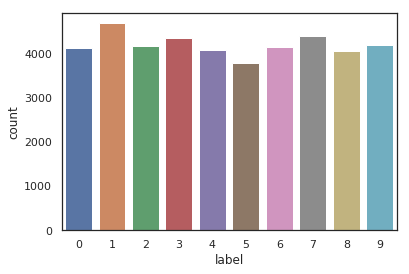

In [4]:
ax=sns.countplot(Y_train)

**Checking Data for Null and Missing values**
Checking data for any missing or null value.

In [5]:
X_train.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

**Data Normalization**
Normalizing data so that all input values are on same scale which helps in faster convergence.

In [7]:

X_train=X_train/255.0
test_df = test_df/255.0


**Data Reshaping**

Here we have grayscale input images (28px*28px) which is a 1-D vector of 784 values, so converting it in to (Height X Width X Num_channels) format. 

In [8]:
print(X_train.shape)

(42000, 784)


In [9]:
X_train=X_train.values.reshape(-1,28,28,1)  
test_df=test_df.values.reshape(-1,28,28,1)
# -1 in rehsape function means an unknown dimention which we want numpy to figure out by itself.
# Here we have 42000 samples so numpy will figure it out and create a matrix of (42000*28*28*1)


**Encoding Output in to One-Hot-Encoding**

A one-hot encoding is a representation of categorical variables (e.g. cat, dog, rat) as binary vectors (e.g. [1,0,0], [0,1,0], [0,0,1]).

In [10]:
Y_train=keras.utils.to_categorical(Y_train,num_classes=10)

**Train and Cross-Validation Set split**

In [11]:
X_train,X_val,Y_train, Y_val = sklearn.model_selection.train_test_split(X_train,Y_train,test_size = 0.1, random_state=1)

Now our data is ready so for processing, next step is to define or model. 
Before defining our model let us see how our data looks like in reality. So plotting few images.

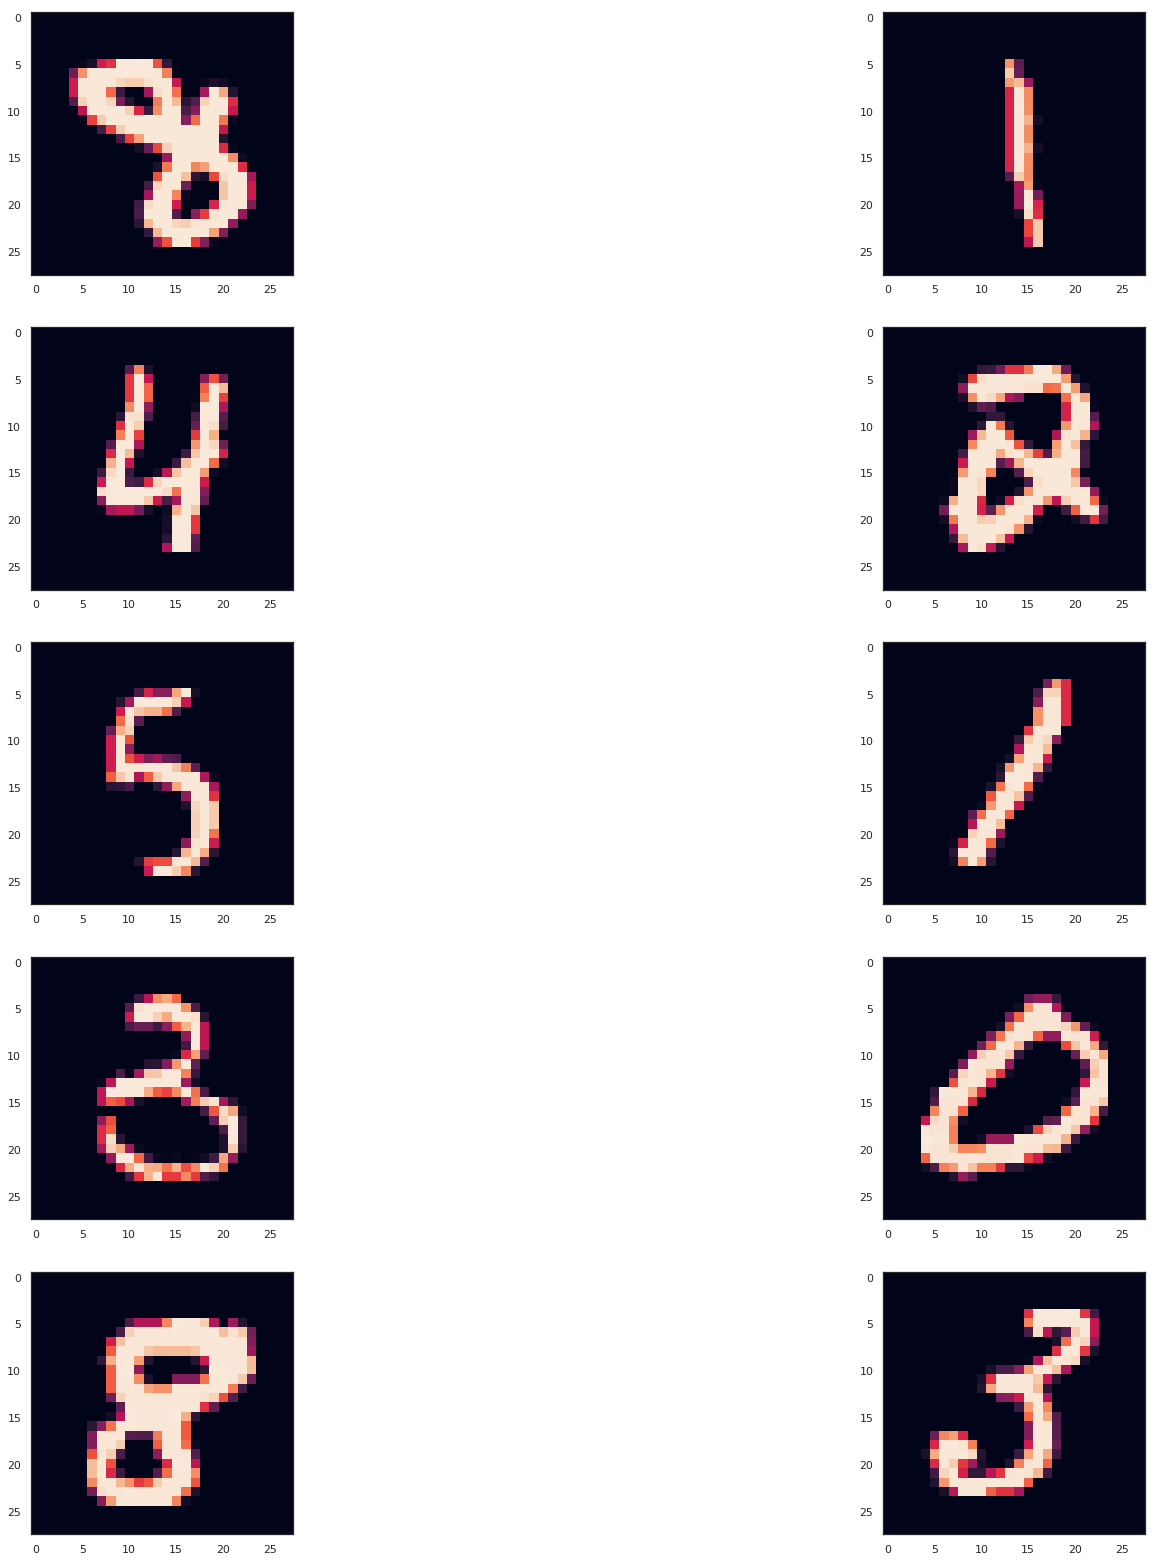

In [12]:
fig=plt.figure(figsize=(28,28))
columns = 2
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i][:,:,0])
plt.show()



**MODEL**

Now its time do define our model. We will be implementing a Convolutionl neural network (CNN) using keras.

In [13]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = keras.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [14]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Train the model, iterating on the data in batches of 84 samples
history=model.fit(X_train, Y_train, epochs=10, batch_size=84,validation_data=(X_val, Y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 173s 5ms/step - loss: 0.2348 - acc: 0.9246 - val_loss: 0.0524 - val_acc: 0.9840
Epoch 2/10
37800/37800 [==============================] - 173s 5ms/step - loss: 0.0725 - acc: 0.9779 - val_loss: 0.0444 - val_acc: 0.9874
Epoch 3/10
37800/37800 [==============================] - 174s 5ms/step - loss: 0.0543 - acc: 0.9839 - val_loss: 0.0435 - val_acc: 0.9864
Epoch 4/10
37800/37800 [==============================] - 172s 5ms/step - loss: 0.0471 - acc: 0.9869 - val_loss: 0.0314 - val_acc: 0.9893
Epoch 5/10
37800/37800 [==============================] - 172s 5ms/step - loss: 0.0403 - acc: 0.9878 - val_loss: 0.0394 - val_acc: 0.9888
Epoch 6/10
37800/37800 [==============================] - 172s 5ms/step - loss: 0.0372 - acc: 0.9891 - val_loss: 0.0315 - val_acc: 0.9900
Epoch 7/10
37800/37800 [==============================] - 175s 5ms/step - loss: 0.0333 - acc: 0.9904 - val_loss: 0.0308 - v

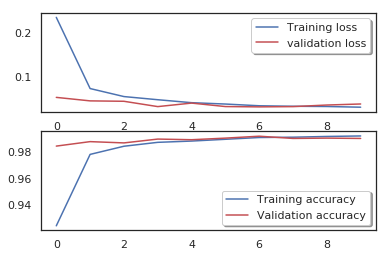

In [15]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [16]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
#print(Y_pred)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
#print(Y_pred_classes)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 


In [17]:
print("Confusion Matrix :: \n \n", confusion_mtx,"\n\n")


Confusion Matrix :: 
 
 [[417   0   2   0   0   0   1   0   0   0]
 [  0 484   1   0   0   0   0   1   2   0]
 [  0   0 414   3   0   0   0   3   1   0]
 [  0   0   0 421   0   2   0   0   0   0]
 [  0   2   1   0 418   0   0   1   0   4]
 [  0   0   0   3   0 387   1   0   0   0]
 [  0   0   0   0   2   1 399   0   1   0]
 [  0   0   1   1   0   0   0 401   0   0]
 [  0   0   1   1   0   0   1   1 406   1]
 [  0   0   0   2   0   1   0   1   0 410]] 




In [18]:
# predict results
results = model.predict(test_df)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_submission.csv",index=False)

In [19]:
!ls
print(submission)


__notebook__.ipynb  __output__.json  cnn_mnist_submission.csv
       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
5            6      7
6            7      0
7            8      3
8            9      0
9           10      3
10          11      5
11          12      7
12          13      4
13          14      0
14          15      4
15          16      3
16          17      3
17          18      1
18          19      9
19          20      0
20          21      9
21          22      1
22          23      1
23          24      5
24          25      7
25          26      4
26          27      2
27          28      7
28          29      4
29          30      7
...        ...    ...
27970    27971      5
27971    27972      0
27972    27973      4
27973    27974      8
27974    27975      0
27975    27976      3
27976    27977      6
27977    27978      0
27978    27979      1
27979    27980      9
27980    27981